# Gradient Descent

- Given a dependence relation, grad descent can help compute vals of the coeff and intercept to map the variables linearly.
- Gives the weights and bias for prediction equations.

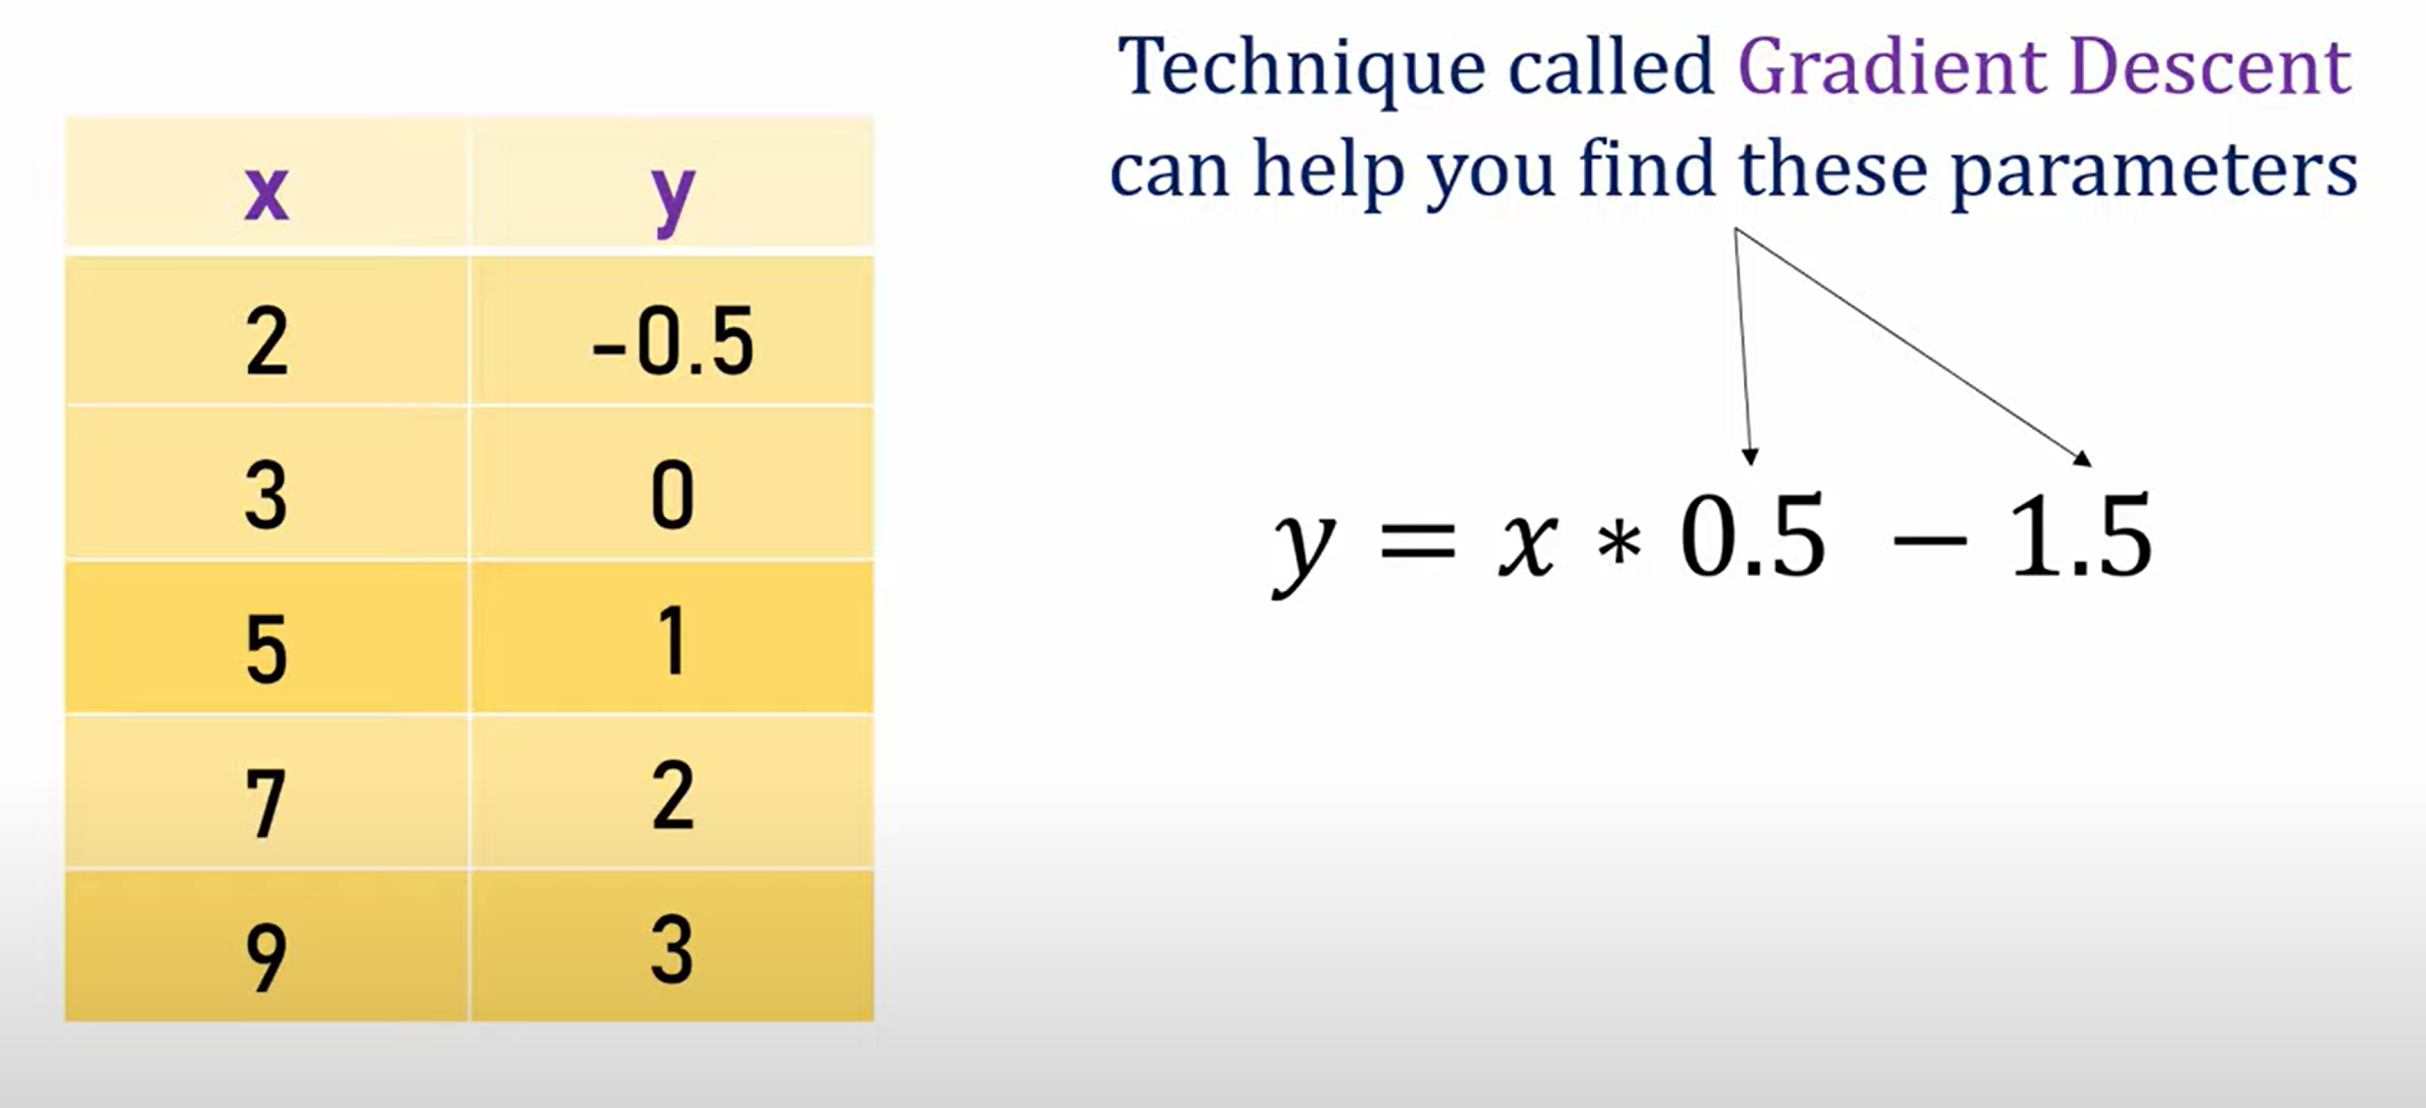

- Forward Pass ---> feed 1 sample to the NN/neuron with random init for weights and bias.
- calculate predicted val by passing through activation and bias addition and compare prediction to truth.
- calculate error ---> could be log loss in case of log regression.
- repeat for all samples and keep computing the error.
- cost = summation of individual losses per epoch.
- now calculate the cost/ sum of errors, binary cross entropy in case of a log regr. neuron for binary classification.
- after epoch 1 total log loss/ cost calc.
- now back propogate the log loss to update the weights assigned to the features.
- to update weights we need to know what val to use to modify individual weights to find a global optimum weight val for a features.
- use derivative of the loss wrt individual feature weights, how much does a change in the weight influence the error.
- learning rate throttles changes in the weights.

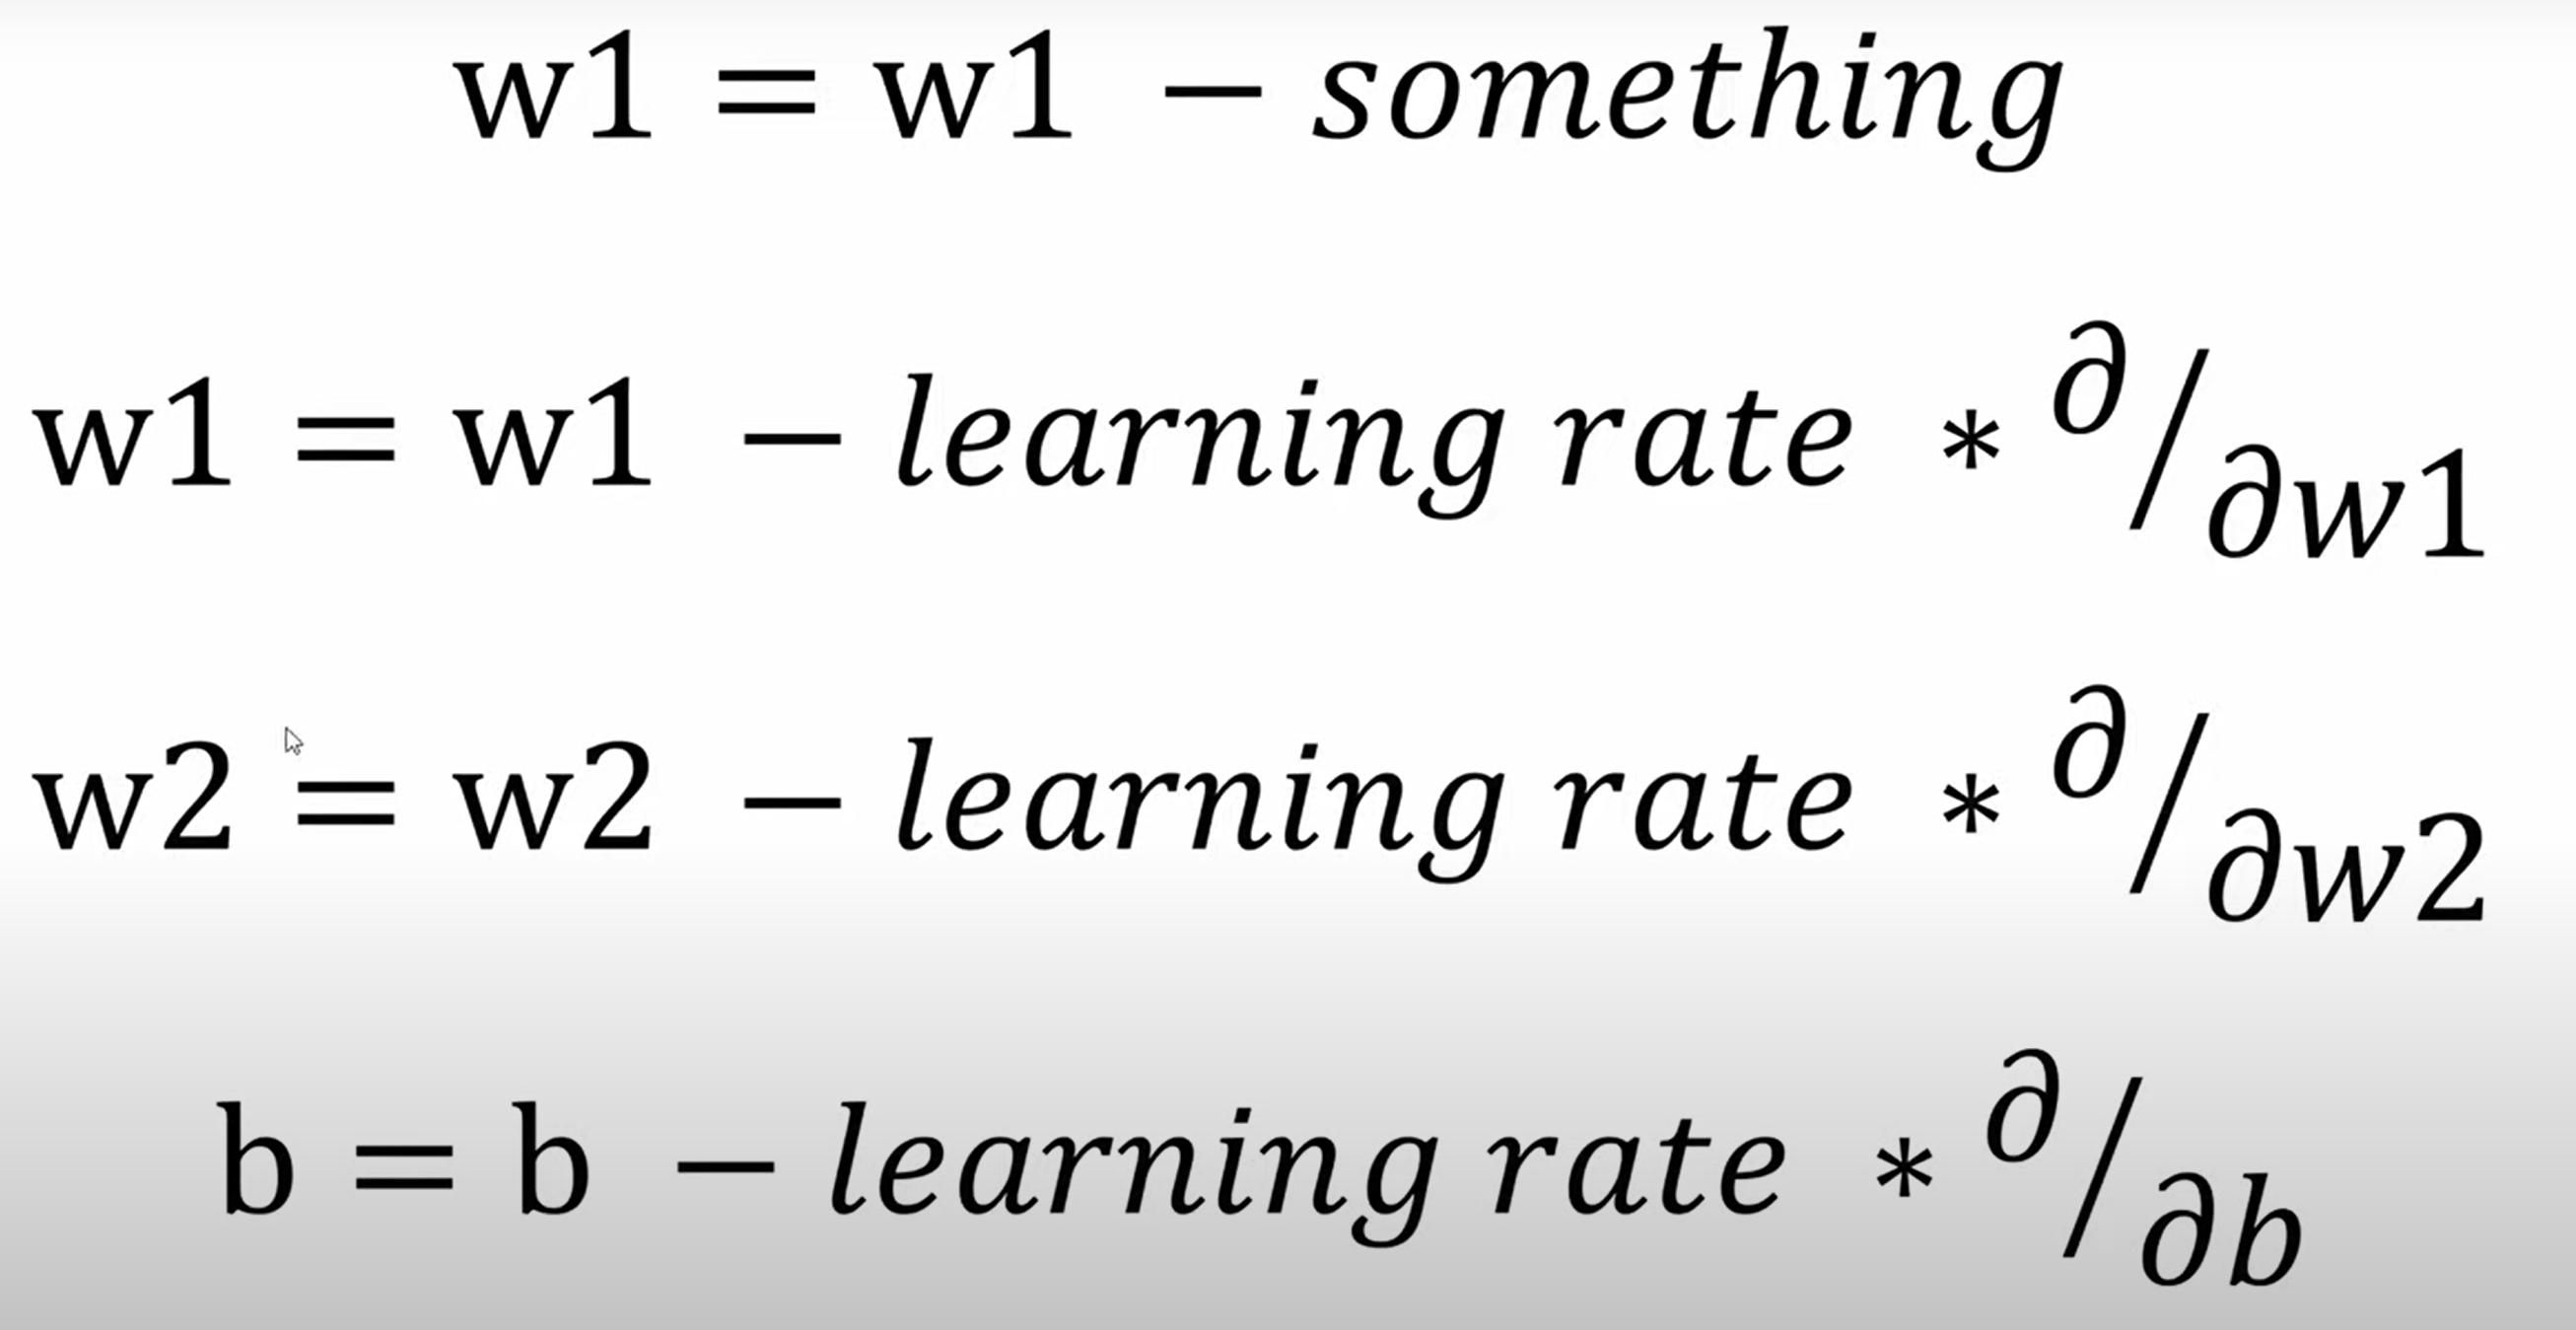

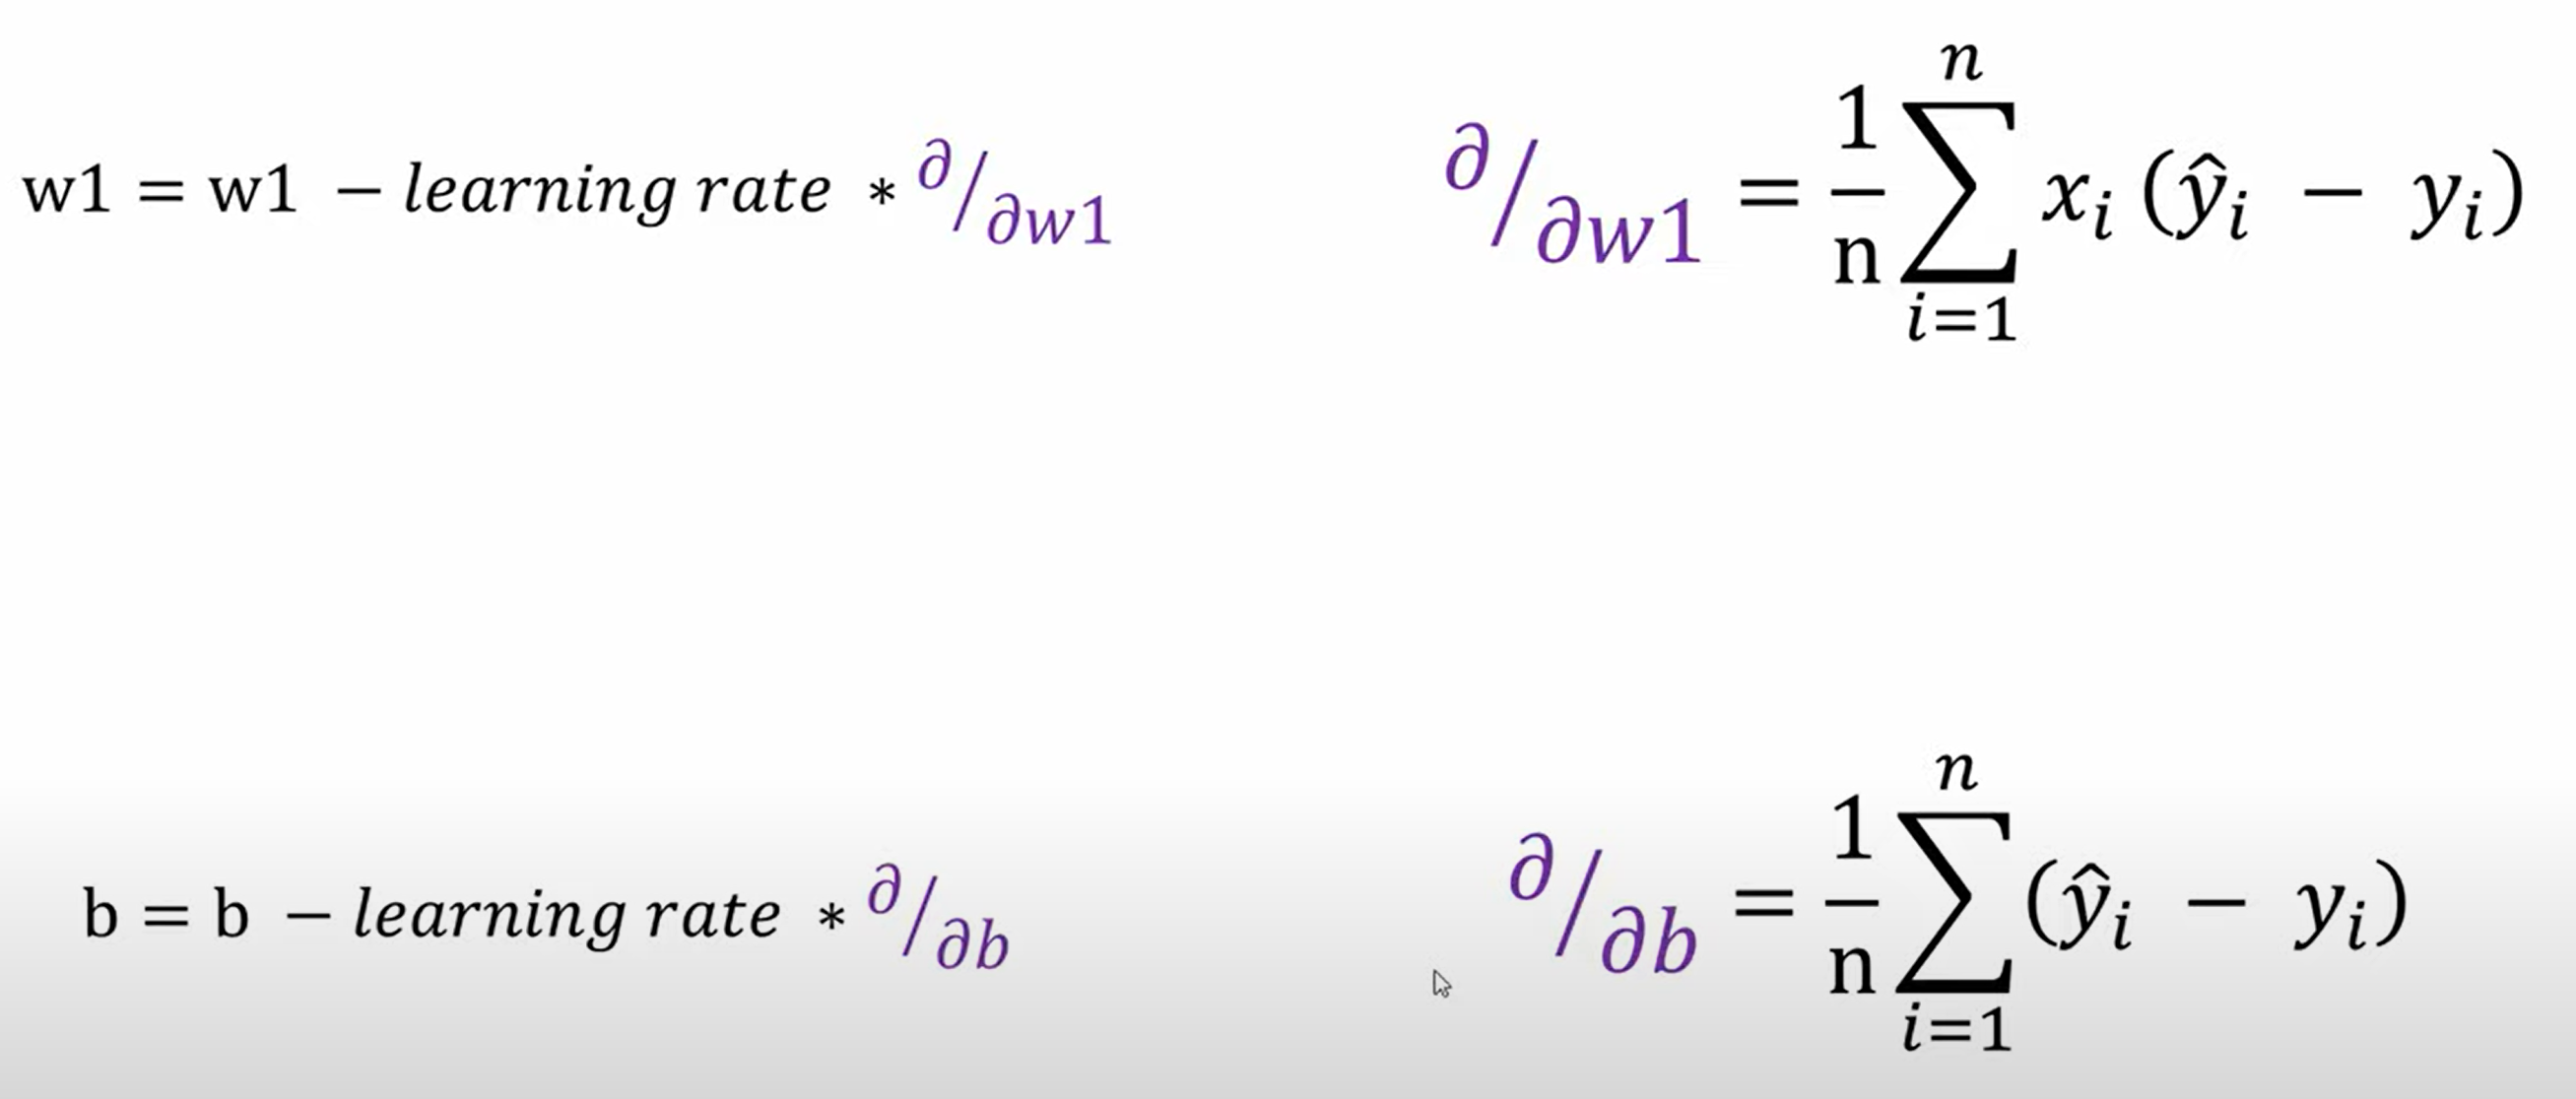

- now forward pass with the updated weights and bias.
- find w and b so that the loss is at a global minima.

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
df = pd.read_csv('Datasets/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df['bought_insurance'], test_size=0.15, random_state=42)

In [48]:
mmscaler = MinMaxScaler()
X_train_scaled = mmscaler.fit_transform(X_train)
X_test_scaled = mmscaler.fit_transform(X_test)

X_train_scaled

array([[0.21428571, 0.        ],
       [0.95238095, 1.        ],
       [0.52380952, 1.        ],
       [0.23809524, 1.        ],
       [0.26190476, 0.        ],
       [0.88095238, 1.        ],
       [0.16666667, 0.        ],
       [0.66666667, 1.        ],
       [0.9047619 , 1.        ],
       [0.69047619, 1.        ],
       [0.16666667, 0.        ],
       [0.64285714, 1.        ],
       [0.80952381, 0.        ],
       [0.11904762, 1.        ],
       [0.76190476, 1.        ],
       [0.02380952, 0.        ],
       [0.66666667, 1.        ],
       [0.07142857, 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.73809524, 1.        ],
       [0.        , 1.        ],
       [0.88095238, 0.        ]])

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,),
    activation='sigmoid',
    kernel_initializer='ones', # weights = 1
    bias_initializer='zeros'   # bias = 0
)])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.4783 - loss: 0.7231
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4783 - loss: 0.7227
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4783 - loss: 0.7222
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4783 - loss: 0.7218
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4783 - loss: 0.7213
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4783 - loss: 0.7209
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4783 - loss: 0.7204
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4783 - loss: 0.7200
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4783 - loss: 0.7195
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4783 - loss: 0.7191
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4783 - loss: 0.7186
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy

In [ ]:
### after 2000 epochs ----> loss = 0.4952 with an accuracy of 82% for the regular model

In [ ]:
### optimized model increases the learning rate and reduces epochs significantly.

opt_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,),
    activation='sigmoid',
    kernel_initializer='ones', # weights = 1
    bias_initializer='zeros'   # bias = 0
)])

opt = keras.optimizers.Adam(learning_rate=0.1)

opt_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

opt_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.4783 - loss: 0.7231
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5217 - loss: 0.6818
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5652 - loss: 0.6494
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6087 - loss: 0.6266
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6087 - loss: 0.6124
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6087 - loss: 0.6041
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8261 - loss: 0.5990
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9130 - loss: 0.5952
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9130 - loss: 0.5914
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9130 - loss: 0.5867


In [56]:
#### heavy model with 5000 epochs but low learning rates
heavy_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,),
    activation='sigmoid',
    kernel_initializer='ones', # weights = 1
    bias_initializer='zeros'   # bias = 0
)])

opt = keras.optimizers.Adam(learning_rate=0.0001)

heavy_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

heavy_model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.4783 - loss: 0.7231
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4783 - loss: 0.7231
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4783 - loss: 0.7230
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4783 - loss: 0.7230
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4783 - loss: 0.7230
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4783 - loss: 0.7229
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4783 - loss: 0.7229
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4783 - loss: 0.7228
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4783 - loss: 0.7228
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4783 - loss: 0.7227
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4783 - loss: 0.7227
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4783 - lo

In [58]:
# evaluation - basic model
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.1042


[0.10423819720745087, 1.0]

In [59]:
# evaluation - optimized model
opt_model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.4854


[0.4854264259338379, 1.0]

In [60]:
# evaluation - heavy model
heavy_model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8000 - loss: 0.4390


[0.4390019476413727, 0.800000011920929]

In [61]:
### checking final weigths and biases for the models

model.get_weights()

[array([[4.388039],
        [1.629247]], dtype=float32),
 array([-3.428913], dtype=float32)]

In [62]:
opt_model.get_weights()

[array([[0.95260763],
        [0.3393356 ]], dtype=float32),
 array([-0.8389868], dtype=float32)]

In [63]:
heavy_model.get_weights()

[array([[0.99294966],
        [0.5913489 ]], dtype=float32),
 array([-0.4455964], dtype=float32)]